<font face="Calibri" size="2"> <i>SBAE - Notebook Series - Part I, version 0.1,  March 2023. Andreas Vollrath, Daniel Wiell, Javier Garcia-Perez, Remi D'Annunzio - UN-Food and Agricultural Organization, Rome</i>
</font>

![title](images/header.png)

# I - Pre-analysis
### Forest and Deforestation statistics and sample size calculation & simulation 
-------


This notebook is intended to provide some basic information on forest statistics for the Area of Interest. 
It includes various parts:
    
1. Forest area and deforestation statistics according to GFC
2. Theoretical sample size calculation according to Cochran for captuing deforestation
3. Simulation of sampling size based on GFC product
4. yearly deforestation statistics (to be added)

In [1]:
import ee 
ee.Initialize()

from sampling_handler.sampling import sample_size

/home/sepal-user/venv/eSBAE/lib/python3.8/site-packages/bfast/__init__.py:10: UserWarning: cupy is not available in this environment, GPU fonctionnalities won't be available
  warn("cupy is not available in this environment, GPU fonctionnalities won't be available")


In [ ]:
# custom area stats in square kilometers
#country_area = 123456789           # km2
#forest_area =  12345678            # km2
#annual_deforestation_area = 10000  #km2
#observation_period = 5 # years
#
## do not change that
#area_dict = {
#    total_area: country_area,
#    forest_area: forest_area,
#    change_area: annual_deforestation_area * observation_period
#}

In [12]:
# period of change
start_year = 2010
end_year = 2021

# forest definition
tree_cover = 20         # in percent
#mmu = 0.5               # in hectare

target_error = 0.1  # fraction 0-1
conf_interval = 0.95 

# aoi (various options)
# based on earth engine feature collection
country = 'Uganda'
gaul = ee.FeatureCollection("FAO/GAUL/2015/level1")
aoi = gaul.filter(ee.Filter.eq("ADM0_NAME", country)).union()

# get area statistics from Hansen's GFC data from Google Earth Engine
area_dict = sample_size.gfc_area_statistics(aoi, start_year, end_year, tree_cover)

According to the GFC product, the Area of Interest covers an area of 21413.96 square kilometers, of which 1797.44 square kilometers have been forested in 2020 (8.39 %). Between 2020 and 2021, 27.65 square kilometers have been deforested.That corresponds to 13.825 square kilometers of annual deforestation in average.


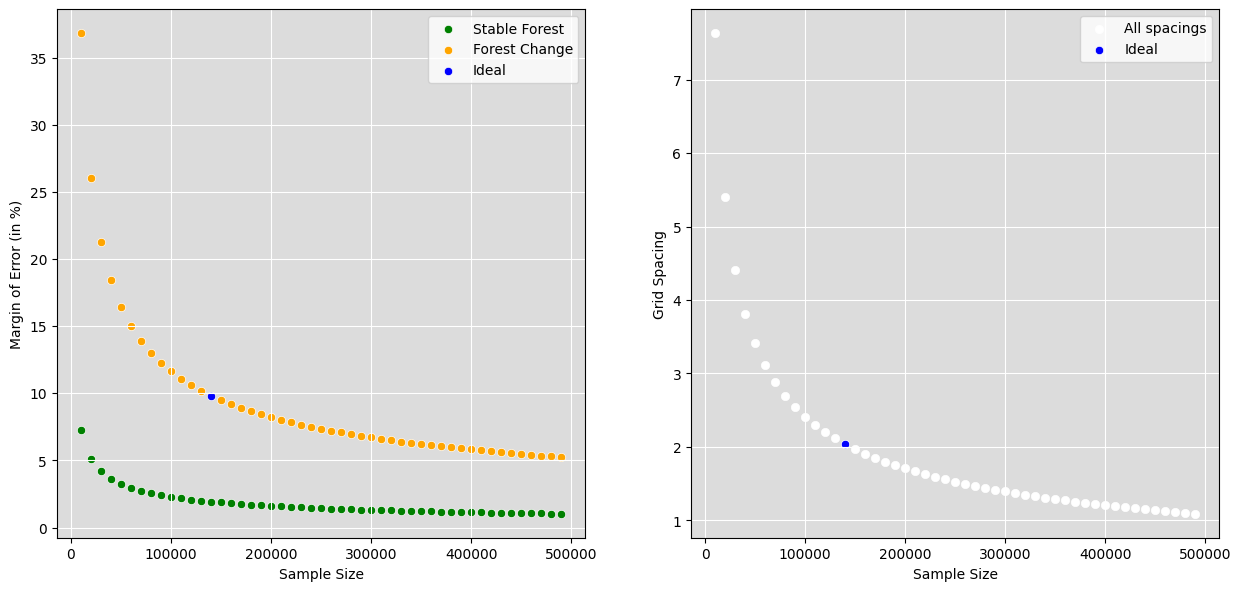

In [3]:
calculated_df, selected_spacing = sample_size.determine_minimum_sample_size(area_dict, target_error, conf_interval)
sample_size.display_minimum_sample_size(calculated_df, selected_spacing)

In [5]:
nr_of_runs_per_grid = 3
grid_spacings = [2000, 4000]
simulated_df = sample_size.gfc_sampling_simulation(aoi,
        start_year,
        end_year,
        area_dict,
        nr_of_runs_per_grid,
        grid_spacings,
        random_seed=7,
        scale=30
)

 Running the sampling error simulation. Please be patient, this can take a while.
 Running 3 times the sample error simulation with a grid spacing of 2000 meters at a scale of 30.
 Running 3 times the sample error simulation with a grid spacing of 4000 meters at a scale of 30.


In [ ]:
from docx import Document
from docx.shared import Inches

In [ ]:
document = Document()

document.add_heading('Document Title', 0)

p = document.add_paragraph('A plain paragraph having some ')
p.add_run('bold').bold = True
p.add_run(' and some ')
p.add_run('italic.').italic = True

document.add_heading('Heading, level 1', level=1)
document.add_paragraph('Intense quote', style='Intense Quote')

document.add_paragraph(
    'first item in unordered list', style='List Bullet'
)
document.add_paragraph(
    'first item in ordered list', style='List Number'
)

document.add_picture('/home/sepal-user/modules/sbae_point_analysis/images/header.png', width=Inches(7.5))

records = (
    (3, '101', 'Spam'),
    (7, '422', 'Eggs'),
    (4, '631', 'Spam, spam, eggs, and spam')
)

table = document.add_table(rows=1, cols=3)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Qty'
hdr_cells[1].text = 'Id'
hdr_cells[2].text = 'Desc'
for qty, id, desc in records:
    row_cells = table.add_row().cells
    row_cells[0].text = str(qty)
    row_cells[1].text = id
    row_cells[2].text = desc

document.add_page_break()

document.save('demo.docx')

In [ ]:
d = Document('demo.docx')

In [ ]:
d.add_picture('/home/sepal-user/modules/sbae_point_analysis/images/header.png', width=Inches(7.5))

In [ ]:
d.save('demo.docx')

In [ ]:
d.